### Feature extraction

In [3]:
# import libraries
import pandas as pd
import string
import collections
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/APPLE/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
# read our CVS from Part 1
df = pd.read_csv('thebiglist_clean.csv')
df

,Brand,Variety,Style,Country,Stars
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5
...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0


In [5]:
# more infomation can be extract from above df ie: Variey
# get the Veriety coloumn
variety = df['Variety']
variety

0                                       Seafood Sara Udon
1                     Chongqing Spicy & Sour Rice Noodles
2                    Seafood Flavour Sichuan Spicy Noodle
3                Jiangnan Style Noodle - Original Flavour
4                                      CupStar Shio Ramen
                              ...                        
3687    Hu Tiu Nam Vang ["Phnom Penh" style] Asian Sty...
3688                       Oriental Style Instant Noodles
3689                                       Tom Yum Shrimp
3690                                 Tom Yum Chili Flavor
3691                                           Miso Ramen
Name: Variety, Length: 3692, dtype: object

In [6]:
# To get the frequency of the words in variety
# combine them in single text by join with space
variety_text = ' '.join(variety)
variety_text

'Seafood Sara Udon Chongqing Spicy & Sour Rice Noodles Seafood Flavour Sichuan Spicy Noodle Jiangnan Style Noodle - Original Flavour CupStar Shio Ramen Big Boss Broad Noodle Chili Oil Flavor (Sour & Hot) Top Ramen Masala Noodles Miyashi Chuka Cold Noodle Tanukioyaji Super Spicy Mazemen Michio Kawamura Nature Ramen Shio Mochichi Wonton Noodle Instant Yakosoba XL Chajang (Bean Sauce) Flavor Spicy Baby Clam Flavor Cup Instant Rice Noodles Oriental Kitchen Hot Korean Instant Noodles Coconut Chicken Curry Rice Noodle Soup Shoyu Flavor Karaage Ginger Shio Ramen Raoh Soy Sauce Flavor Ramen Souper Bowl Noodle Pho Rice Noodle Mild Sekai no Yamachan Phantom Chicken Wings Yakisoba Artificial Beef With Sauerkraut Quick Pasta Creamy Icon Ramen Noodles Creamy Chicken Gumbo Mi Instant Rasa Vegetarian Shin Red Super Spicy Buldak Challenge Daimori Osaka Kasoudon Pepper Sesame Red Oil Sesame Paste Fragrant In Original Taste Sesame Paste Kiseki Ramen Chicken Flavor Ramen Hotter & Spicier Ramen Beef Flavo

In [7]:
variety_text_lower = variety_text.lower()
variety_text_lower 

'seafood sara udon chongqing spicy & sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle - original flavour cupstar shio ramen big boss broad noodle chili oil flavor (sour & hot) top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang (bean sauce) flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter & spicier ramen beef flavo

In [8]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [9]:
# to remove the punctuation marks
punc_list = list(string.punctuation)
punc_list

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [10]:
# extract char that is not in punctuation list
[char for char in variety_text_lower if char not in punc_list]

['s',
 'e',
 'a',
 'f',
 'o',
 'o',
 'd',
 ' ',
 's',
 'a',
 'r',
 'a',
 ' ',
 'u',
 'd',
 'o',
 'n',
 ' ',
 'c',
 'h',
 'o',
 'n',
 'g',
 'q',
 'i',
 'n',
 'g',
 ' ',
 's',
 'p',
 'i',
 'c',
 'y',
 ' ',
 ' ',
 's',
 'o',
 'u',
 'r',
 ' ',
 'r',
 'i',
 'c',
 'e',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 's',
 ' ',
 's',
 'e',
 'a',
 'f',
 'o',
 'o',
 'd',
 ' ',
 'f',
 'l',
 'a',
 'v',
 'o',
 'u',
 'r',
 ' ',
 's',
 'i',
 'c',
 'h',
 'u',
 'a',
 'n',
 ' ',
 's',
 'p',
 'i',
 'c',
 'y',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 ' ',
 'j',
 'i',
 'a',
 'n',
 'g',
 'n',
 'a',
 'n',
 ' ',
 's',
 't',
 'y',
 'l',
 'e',
 ' ',
 'n',
 'o',
 'o',
 'd',
 'l',
 'e',
 ' ',
 ' ',
 'o',
 'r',
 'i',
 'g',
 'i',
 'n',
 'a',
 'l',
 ' ',
 'f',
 'l',
 'a',
 'v',
 'o',
 'u',
 'r',
 ' ',
 'c',
 'u',
 'p',
 's',
 't',
 'a',
 'r',
 ' ',
 's',
 'h',
 'i',
 'o',
 ' ',
 'r',
 'a',
 'm',
 'e',
 'n',
 ' ',
 'b',
 'i',
 'g',
 ' ',
 'b',
 'o',
 's',
 's',
 ' ',
 'b',
 'r',
 'o',
 'a',
 'd',
 ' ',
 'n',
 'o',
 'o'

In [11]:
# rejoin them back to word without space
variety_clean = ''.join([char for char in variety_text_lower if char not in punc_list])
variety_clean

'seafood sara udon chongqing spicy  sour rice noodles seafood flavour sichuan spicy noodle jiangnan style noodle  original flavour cupstar shio ramen big boss broad noodle chili oil flavor sour  hot top ramen masala noodles miyashi chuka cold noodle tanukioyaji super spicy mazemen michio kawamura nature ramen shio mochichi wonton noodle instant yakosoba xl chajang bean sauce flavor spicy baby clam flavor cup instant rice noodles oriental kitchen hot korean instant noodles coconut chicken curry rice noodle soup shoyu flavor karaage ginger shio ramen raoh soy sauce flavor ramen souper bowl noodle pho rice noodle mild sekai no yamachan phantom chicken wings yakisoba artificial beef with sauerkraut quick pasta creamy icon ramen noodles creamy chicken gumbo mi instant rasa vegetarian shin red super spicy buldak challenge daimori osaka kasoudon pepper sesame red oil sesame paste fragrant in original taste sesame paste kiseki ramen chicken flavor ramen hotter  spicier ramen beef flavor ramen 

In [12]:
# this will ignore the empty spacing and tokenize each word
variety_tokens = nltk.tokenize.word_tokenize(variety_clean)
variety_tokens

['seafood',
 'sara',
 'udon',
 'chongqing',
 'spicy',
 'sour',
 'rice',
 'noodles',
 'seafood',
 'flavour',
 'sichuan',
 'spicy',
 'noodle',
 'jiangnan',
 'style',
 'noodle',
 'original',
 'flavour',
 'cupstar',
 'shio',
 'ramen',
 'big',
 'boss',
 'broad',
 'noodle',
 'chili',
 'oil',
 'flavor',
 'sour',
 'hot',
 'top',
 'ramen',
 'masala',
 'noodles',
 'miyashi',
 'chuka',
 'cold',
 'noodle',
 'tanukioyaji',
 'super',
 'spicy',
 'mazemen',
 'michio',
 'kawamura',
 'nature',
 'ramen',
 'shio',
 'mochichi',
 'wonton',
 'noodle',
 'instant',
 'yakosoba',
 'xl',
 'chajang',
 'bean',
 'sauce',
 'flavor',
 'spicy',
 'baby',
 'clam',
 'flavor',
 'cup',
 'instant',
 'rice',
 'noodles',
 'oriental',
 'kitchen',
 'hot',
 'korean',
 'instant',
 'noodles',
 'coconut',
 'chicken',
 'curry',
 'rice',
 'noodle',
 'soup',
 'shoyu',
 'flavor',
 'karaage',
 'ginger',
 'shio',
 'ramen',
 'raoh',
 'soy',
 'sauce',
 'flavor',
 'ramen',
 'souper',
 'bowl',
 'noodle',
 'pho',
 'rice',
 'noodle',
 'mild',
 

In [13]:
# establish a dictionary
variety_counter = collections.Counter(variety_tokens)
variety_counter

Counter({'seafood': 140,
         'sara': 3,
         'udon': 124,
         'chongqing': 10,
         'spicy': 413,
         'sour': 59,
         'rice': 178,
         'noodles': 889,
         'flavour': 517,
         'sichuan': 31,
         'noodle': 762,
         'jiangnan': 3,
         'style': 122,
         'original': 42,
         'cupstar': 5,
         'shio': 50,
         'ramen': 630,
         'big': 58,
         'boss': 2,
         'broad': 9,
         'chili': 58,
         'oil': 54,
         'flavor': 491,
         'hot': 187,
         'top': 28,
         'masala': 24,
         'miyashi': 1,
         'chuka': 6,
         'cold': 14,
         'tanukioyaji': 1,
         'super': 44,
         'mazemen': 1,
         'michio': 3,
         'kawamura': 3,
         'nature': 3,
         'mochichi': 1,
         'wonton': 13,
         'instant': 560,
         'yakosoba': 1,
         'xl': 2,
         'chajang': 5,
         'bean': 33,
         'sauce': 211,
         'baby': 6,
       

In [14]:
variety_counter.most_common()

[('noodles', 889),
 ('noodle', 762),
 ('ramen', 630),
 ('instant', 560),
 ('flavour', 517),
 ('flavor', 491),
 ('chicken', 419),
 ('spicy', 413),
 ('soup', 314),
 ('beef', 314),
 ('cup', 252),
 ('with', 224),
 ('sauce', 211),
 ('curry', 188),
 ('hot', 187),
 ('rice', 178),
 ('tom', 152),
 ('shrimp', 151),
 ('artificial', 149),
 ('mi', 142),
 ('seafood', 140),
 ('pork', 140),
 ('bowl', 138),
 ('udon', 124),
 ('style', 122),
 ('tonkotsu', 108),
 ('yum', 107),
 ('yakisoba', 99),
 ('goreng', 96),
 ('sesame', 89),
 ('vermicelli', 85),
 ('miso', 81),
 ('shoyu', 77),
 ('oriental', 71),
 ('vegetable', 71),
 ('soy', 70),
 ('kimchi', 68),
 ('demae', 67),
 ('penang', 66),
 ('vegetarian', 61),
 ('mushroom', 61),
 ('sour', 59),
 ('big', 58),
 ('chili', 58),
 ('black', 56),
 ('fried', 56),
 ('oil', 54),
 ('rasa', 52),
 ('sabor', 52),
 ('ramyun', 52),
 ('laksa', 51),
 ('shio', 50),
 ('soba', 50),
 ('thai', 50),
 ('japanese', 49),
 ('korean', 48),
 ('taste', 48),
 ('tomato', 47),
 ('chow', 47),
 ('pep

In [15]:
is_spicy = []

hot_flavor = ['spicy',
             'curry',
             'hot',
             'tom',
             'chili',
             'chilli',
             'kari',
             'pedas',
             'laksa']

#for variety in df['Variety'][:10].str.lower():
#    if any(flavor in variety for flavor in hot_flavor):
#        print(variety)

In [16]:
# above is to show what is the output from the loop
# to complete the code as below :
for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in hot_flavor):
        is_spicy.append(1)
    else:
        is_spicy.append(0)
        
df['is_Spicy'] = is_spicy
df

,Brand,Variety,Style,Country,Stars,is_Spicy
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0
...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1


In [17]:
has_chicken = []

for variety in df['Variety'].str.lower():
    if ('chicken' in variety) or ('ayam'in variety):
        has_chicken.append(1)
    else:
        has_chicken.append(0)
df['has_Chicken'] = has_chicken
df


,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0
...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0


In [18]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken
312,Nissin,Men Shokunin Tantanmen,Bowl,Japan,4.50,0,0
211,Lemonilo,Naked Ramen Chicken Curry Soup,Pack,United States,4.50,1,1
824,Nissin,Cup Noodle Seafood Ramen Noodle Soup,Cup,United States,5.00,0,0
2345,Paldo,Bulnak Bokkummyun Spicy Fried Octopus Ramyun,Pack,South Korea,4.00,1,0
300,Star Anise Foods,Pho Noodle Soup Bowl Creamy Coconut,Cup,United States,0.25,0,0
1997,Mama,Cup Yentafo Tom Yum Mohfai,Cup,Thailand,5.00,1,0
2680,Unox,Good Noodles Oosterse Kip (Oriental Chicken),Pack,Holland,3.50,0,1
962,Wei Lih,Chicken Flavor,Pack,Taiwan,4.00,0,1
1604,Nissin,Big Cup Noodles Seafood Curry Flavour,Cup,Hong Kong,5.00,1,0
103,Sapporo Ichiban,Pokemon Noodle Udon Soy Sauce,Cup,Japan,3.25,0,0


In [19]:
has_beef = []

for variety in df['Variety'].str.lower():
    if ('beef' in variety) or ('cow'in variety):
        has_beef.append(1)
    else:
        has_beef.append(0)
df['has_beef'] = has_beef
df

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0
...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0


In [20]:
df.sample(10)

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef
752,Kiki,Sichuan Beef Noodle Soup,Box,Taiwan,5.00,0,0,1
444,Samyang Foods,Buldak Hot Chicken Flavor Topokki,Bowl,South Korea,4.00,1,1,0
1715,CarJEN,Nyonya Curry Laksa (Improved Taste),Pack,Malaysia,5.00,1,0,0
1213,Samyang Foods,Buldak Bokkeummyun,Cup,South Korea,3.75,0,0,0
39,Toei,Shoyu Hiyashi Chuka,Pack,Japan,4.50,0,0,0
2290,Pop Bihun,Spesial Rasa Kari Ayam Pedas,Pack,Indonesia,3.75,1,1,0
1125,Tao Kae Noi,Creamy tom Yum Kung Flavour,Pack,Thailand,5.00,1,0,0
2331,Mamee,Chef Creamy Tom Yam Flavour,Pack,Malaysia,5.00,1,0,0
1699,Nissin,Gyoretsu-no-Dekiru-Mise-no-Ramen (Shrimp Tanta...,Bowl,Japan,5.00,0,0,0
2557,Indomie,Instant Noodle Beef & Lime Flavour,Pack,Indonesia,4.25,0,0,1


In [75]:
has_seafood =[]
seafood_flavor = ['seafood',
                  'fish',
                  'shrimp',
                  'crab',
                  'prawn']

for variety in df['Variety'].str.lower():
    if any(flavor in variety for flavor in seafood_flavor):
        has_seafood.append(1)
    else:
        has_seafood.append(0)
        
df['has_seafood'] = has_seafood
df

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


### Data exploration

In [76]:
# import libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# first candidate for ploting.. the brands
df['Brand'].value_counts()

Nissin                    476
Maruchan                  131
Nongshim                  119
Myojo                     111
Samyang Foods             102
                         ... 
Chil Kab Farm Products      1
Sahmyook                    1
Easybab                     1
Hide Chan                   1
Osaka Ramen                 1
Name: Brand, Length: 542, dtype: int64

In [78]:
# top 50
brand_count = df['Brand'].value_counts()[:50]
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Acecook               48
Sau Tao               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Vina Acecook          34
Lucky Me!             34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Wei Lih               28
Vedan                 28
A-Sha Dry Noodle      26
Wai Wai               26
Wu-Mu                 23
Yum Yum               23
Itsuki                20
Samyang               19
Koka                  18
Doll                  18
Uni-President         18
Sichuan Baijia        18
New Touch             18
Little Cook           17
Batchelors            16
Mr. Noodles           16
Kamfen                15


([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49],
 <a list of 50 Text xticklabel objects>)

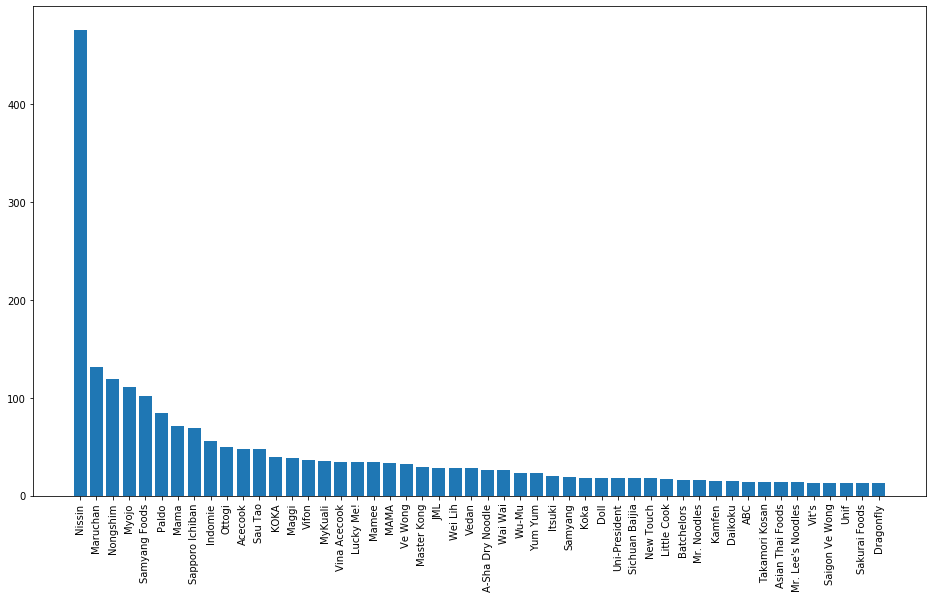

In [79]:
# plot a barplot for brand_count
plt.figure(figsize=(16,9))
plt.bar(brand_count.index,brand_count)
plt.xticks(rotation =90)

<BarContainer object of 50 artists>

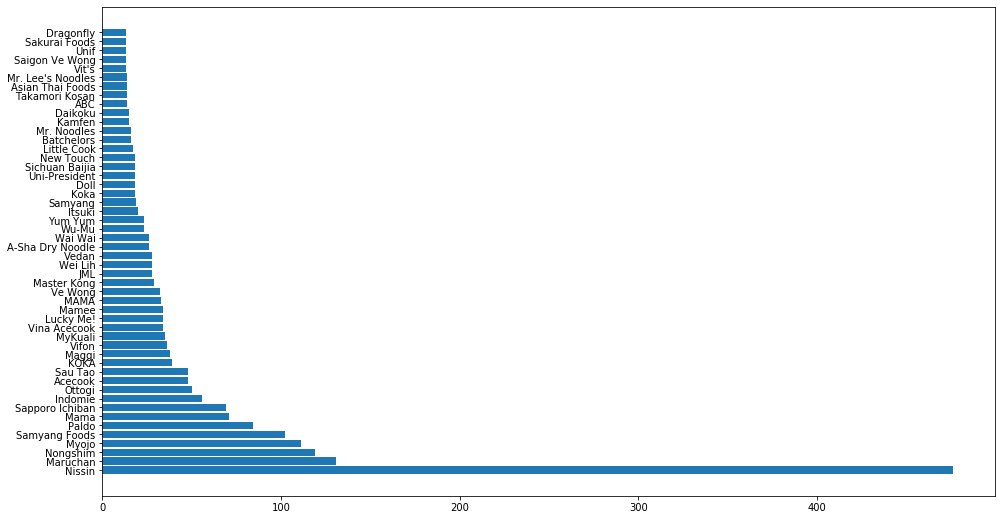

In [80]:
# plot horizontal bar plot
plt.figure(figsize=(16,9))
plt.barh(brand_count.index,brand_count)
#plt.xticks(rotation =90)

In [81]:
# sort the sequence, to make the most on top
brand_count.sort_values(ascending=True)

Dragonfly             13
Vit's                 13
Sakurai Foods         13
Unif                  13
Saigon Ve Wong        13
Mr. Lee's Noodles     14
Asian Thai Foods      14
Takamori Kosan        14
ABC                   14
Daikoku               15
Kamfen                15
Mr. Noodles           16
Batchelors            16
Little Cook           17
Sichuan Baijia        18
Uni-President         18
Doll                  18
Koka                  18
New Touch             18
Samyang               19
Itsuki                20
Yum Yum               23
Wu-Mu                 23
Wai Wai               26
A-Sha Dry Noodle      26
Vedan                 28
JML                   28
Wei Lih               28
Master Kong           29
Ve Wong               32
MAMA                  33
Mamee                 34
Lucky Me!             34
Vina Acecook          34
MyKuali               35
Vifon                 36
Maggi                 38
KOKA                  39
Sau Tao               48
Acecook               48


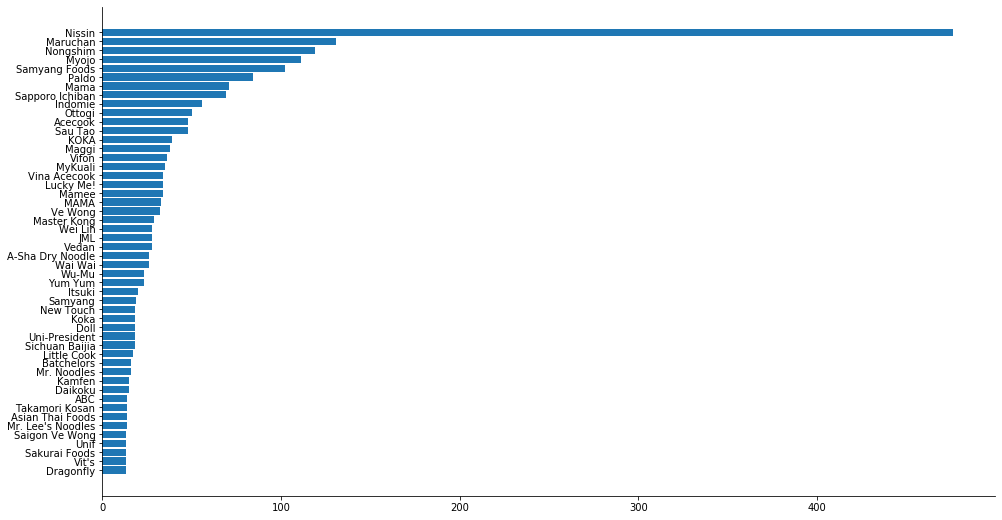

In [82]:
plt.figure(figsize=(16,9))
plt.barh(brand_count.sort_values(ascending=True).index,brand_count.sort_values(ascending=True))
sns.despine()

In [83]:
# explore styles
style_count = df['Style'].value_counts()
style_count

Pack          2085
Bowl           722
Cup            659
Tray           167
Box             54
Restaurant       3
Can              1
Bar              1
Name: Style, dtype: int64

([0, 1, 2, 3, 4, 5, 6, 7], <a list of 8 Text xticklabel objects>)

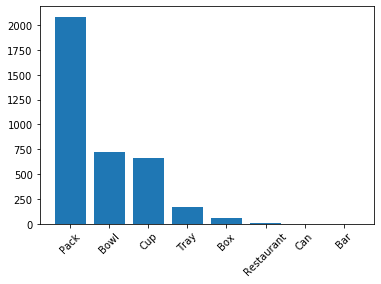

In [84]:
plt.bar(style_count.index,style_count)
plt.xticks(rotation=45)

In [85]:
# explore country columns
country_count = df['Country'].value_counts()
country_count

Japan                 681
United States         458
South Korea           411
Taiwan                372
China                 245
Thailand              212
Malaysia              207
Hong Kong             191
Indonesia             161
Singapore             140
Vietnam               124
UK                     75
Canada                 56
Philippines            51
India                  45
Mexico                 32
Germany                28
Australia              25
Brazil                 24
Netherlands            16
Nepal                  14
Myanmar                14
Bangladesh             12
Pakistan                9
Hungary                 9
Colombia                6
France                  6
Poland                  6
Russia                  5
Sarawak                 5
Cambodia                5
Italy                   4
Fiji                    4
Holland                 4
Peru                    4
Sweden                  3
Ukraine                 3
Israel                  3
Dubai       

In [86]:
len(country_count)

51

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50],
 <a list of 51 Text xticklabel objects>)

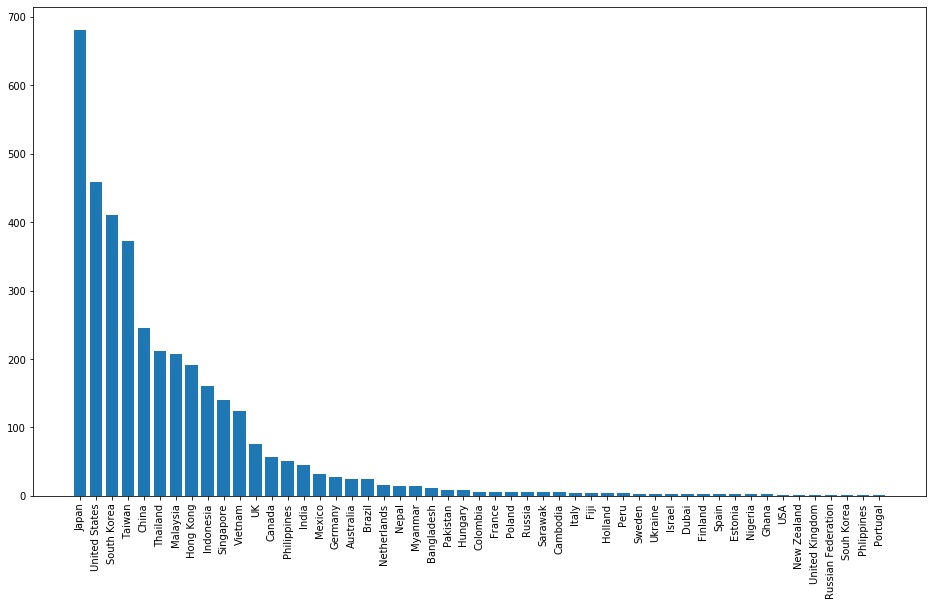

In [87]:
plt.figure(figsize=(16,9))
plt.bar(country_count.index,country_count)
plt.xticks(rotation=90)

(array([  58.,   23.,   54.,   79.,  127.,  210.,  399., 1081.,  658.,
        1003.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

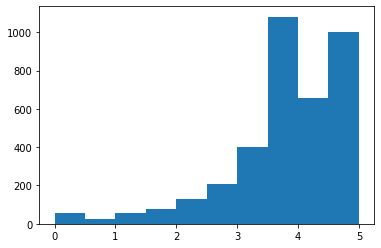

In [88]:
# examine the distribution of score in 'Stars'
plt.hist(df['Stars'])

Chart show that it is not a normal distributor 

In [89]:
df['Stars'].mean()

3.722684182015168

In [90]:
df['Stars'].median()

3.75

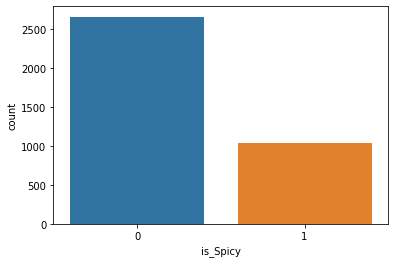

In [91]:
# since it only have 2 value count we use seaborn countplot
sns.countplot(df['is_Spicy'])

around 1000 is_Spicy compare to 2600 of other flavor

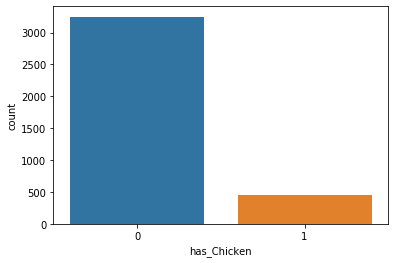

In [92]:
sns.countplot(df['has_Chicken'])

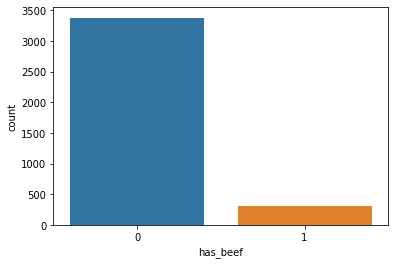

In [93]:
sns.countplot(df['has_beef'])

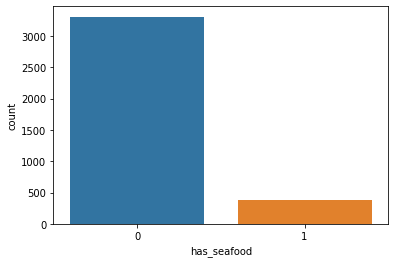

In [94]:
sns.countplot(df['has_seafood'])

Questions to ask:
1. Which brand has the highest Stars?
2. Which country has the highest stars?
3. Which noodle has the highest Star - spicy or non spicy?

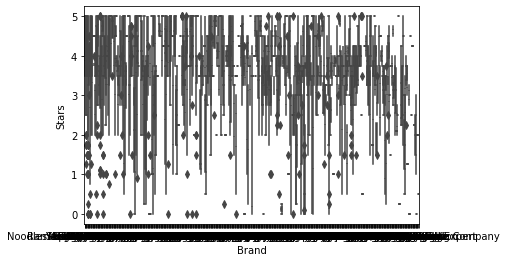

In [95]:
# Question 1 : Which brand has the highest Stars?
sns.boxplot(df['Brand'],df['Stars'])

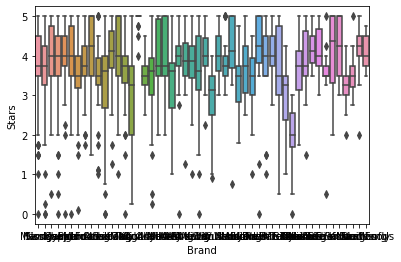

In [96]:
sns.boxplot(df['Brand'],df['Stars'], order=brand_count.index)  # top 50

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

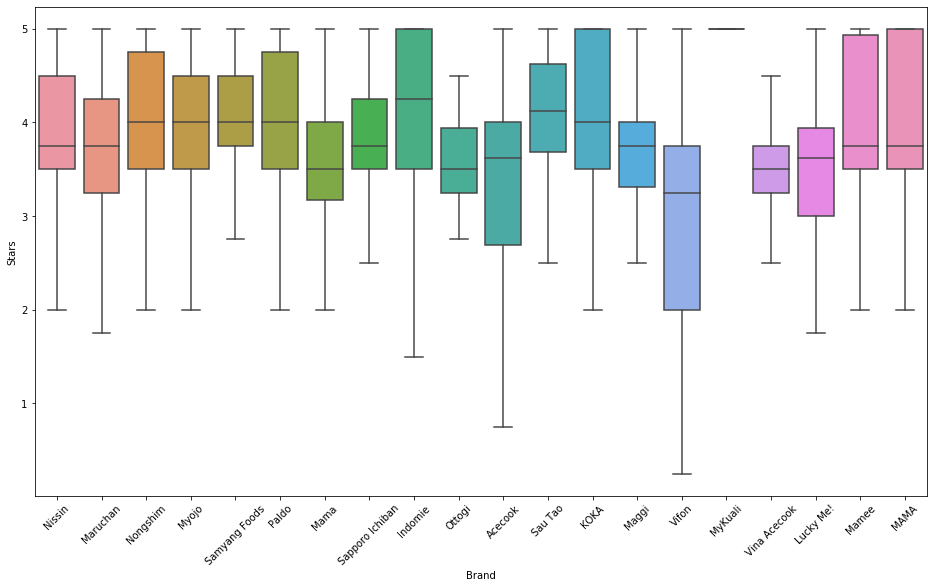

In [97]:
plt.figure(figsize=(16,9))
sns.boxplot(df['Brand'],df['Stars'], 
            order=brand_count.index[:20],   # top 20
           showfliers = False)  
plt.xticks(rotation=45)

Indomie rank the highest median stars score 

In [98]:
# MyKuali seem tobe rated very high?
brand_count

Nissin               476
Maruchan             131
Nongshim             119
Myojo                111
Samyang Foods        102
Paldo                 84
Mama                  71
Sapporo Ichiban       69
Indomie               56
Ottogi                50
Acecook               48
Sau Tao               48
KOKA                  39
Maggi                 38
Vifon                 36
MyKuali               35
Vina Acecook          34
Lucky Me!             34
Mamee                 34
MAMA                  33
Ve Wong               32
Master Kong           29
JML                   28
Wei Lih               28
Vedan                 28
A-Sha Dry Noodle      26
Wai Wai               26
Wu-Mu                 23
Yum Yum               23
Itsuki                20
Samyang               19
Koka                  18
Doll                  18
Uni-President         18
Sichuan Baijia        18
New Touch             18
Little Cook           17
Batchelors            16
Mr. Noodles           16
Kamfen                15


MyKuali got 35 brand count

In [99]:
df[df['Brand']=='MyKuali']

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
188,MyKuali,White Fish Broth Cup Noodle,Cup,Malaysia,5.00,0,0,0,1
199,MyKuali,Penang Red Tom Yum Goong Rice Vermicelli Soup ...,Bowl,Malaysia,5.00,1,0,0,0
213,MyKuali,White Fish Broth Rice Vermicelli,Bowl,Malaysia,5.00,0,0,0,1
229,MyKuali,White Fish Broth Noodle,Pack,Malaysia,5.00,0,0,0,1
230,MyKuali,Penang White Curry Noodle (New Recipe),Pack,Malaysia,5.00,1,0,0,0
490,MyKuali,Gaeng Som Noodle,Cup,Malaysia,4.50,0,0,0,0
942,MyKuali,Hokkien Prawn (2018 Recipe),Pack,Malaysia,5.00,0,0,0,1
951,MyKuali,Penang Red Tom Yum Goong Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
958,MyKuali,Penang White Curry Noodle (2018 Recipe),Pack,Malaysia,5.00,1,0,0,0
1020,MyKuali,Penang White Curry Noodle,Pack,Malaysia,5.00,1,0,0,0


MyKuali is seem tobe the winner for question 1

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

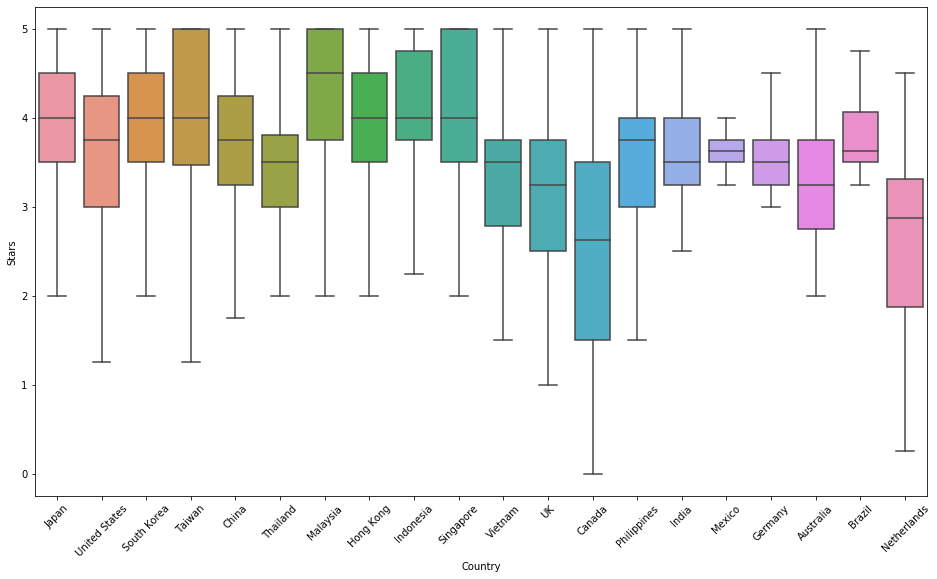

In [100]:
# Question 2 : Which country has the highest Stars?
plt.figure(figsize=(16,9))
sns.boxplot(df['Country'],df['Stars'], 
            order=country_count.index[:20],   # top 20
           showfliers = False)  
plt.xticks(rotation=45)

Malaysia has the highest median score and win in question2 

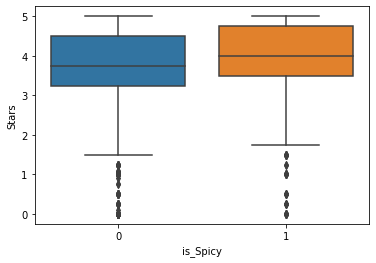

In [101]:
# Question 3 : Which noodle has the highest Star - spicy or non spicy?
sns.boxplot(df['is_Spicy'],df['Stars'])

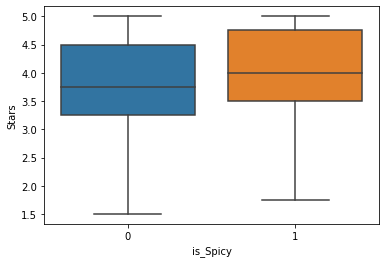

In [102]:
sns.boxplot(df['is_Spicy'],df['Stars'], showfliers=False) # remove outlier

In [103]:
# filter two dataframes
spicy_df = df[df['is_Spicy'] == 1]
nonspicy_df = df[df['is_Spicy'] == 0]

In [104]:
spicy_df

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.50,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.00,1,0,0,1
5,Sichuan Baijia,Big Boss Broad Noodle Chili Oil Flavor (Sour &...,Cup,China,4.50,1,0,0,0
8,Yamamoto Seifun,Tanukioyaji Super Spicy Mazemen,Bowl,Japan,3.50,1,0,0,0
12,MAMA,Spicy Baby Clam Flavor Cup Instant Rice Noodles,Cup,Thailand,4.25,1,0,0,0
...,...,...,...,...,...,...,...,...,...
3674,Ottogi,Jin Ramen (Hot Taste),Pack,South Korea,3.50,1,0,0,0
3676,Samyang,Kalgug-Su (Spicy),Pack,South Korea,3.50,1,0,0,0
3678,Samyang,Hot,Pack,South Korea,3.50,1,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.00,1,0,0,1


In [105]:
nonspicy_df

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
6,Nissin,Top Ramen Masala Noodles,Pack,India,4.0,0,0,0,0
7,Maruchan,Miyashi Chuka Cold Noodle,Pack,Japan,5.0,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3685,Ve Wong,Mushroom Pork,Pack,Vietnam,1.0,0,0,0,0
3686,Vifon,Nam Vang,Pack,Vietnam,2.5,0,0,0,0
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0


In [106]:
print(spicy_df['Stars'].mean())
print(nonspicy_df['Stars'].mean())

3.845135527589545
3.675112824370064


In [107]:
print(spicy_df['Stars'].median())
print(nonspicy_df['Stars'].median())

4.0
3.75


Observation : Spicy noodle median 0.25 higher tha nonspicy noodle, is this legit otherwise? statically significant? To perform a statical test to assess this point (P-test? No, because both of them are not normal distribued (histogram))

(array([ 14.,   6.,  11.,  15.,  44.,  39.,  90., 282., 205., 327.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

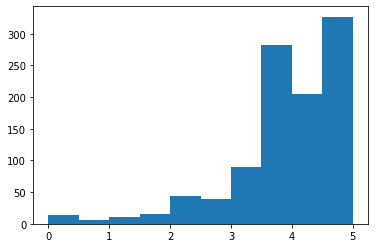

In [108]:
plt.hist(spicy_df['Stars'])

(array([ 44.,  17.,  43.,  64.,  83., 171., 309., 799., 453., 676.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

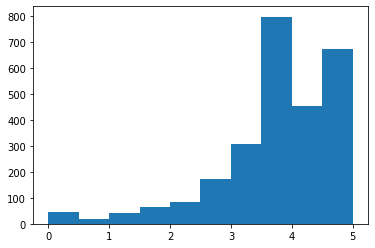

In [109]:
plt.hist(nonspicy_df['Stars'])

(array([ 44.,  17.,  43.,  64.,  83., 171., 309., 799., 453., 676.]),
 array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
 <a list of 10 Patch objects>)

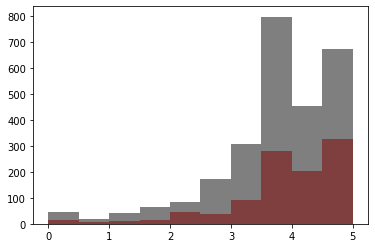

In [110]:
# we can plot them togather
plt.hist(spicy_df['Stars'], alpha=0.5, color='red') # alpha to make it transparent
plt.hist(nonspicy_df['Stars'],alpha=0.5, color='black')

There are follow the similar distribution in different frequency

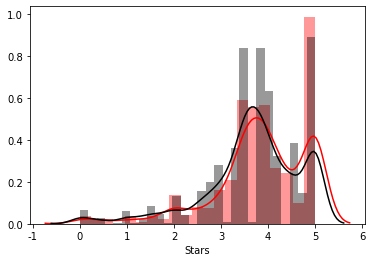

In [111]:
# to plot them in same scale
sns.distplot(spicy_df['Stars'], color='red') 
sns.distplot(nonspicy_df['Stars'], color='black')

In [112]:
# import mann-whitney u test
from scipy.stats import mannwhitneyu # for quantity that are non normal distributed 

In [113]:
mannwhitneyu(spicy_df['Stars'],
            nonspicy_df['Stars'])

MannwhitneyuResult(statistic=1220814.5, pvalue=6.244898720575498e-08)

P-vale < 0.05 -> Statical significant. Stars from Spicy definately different than non spicy 

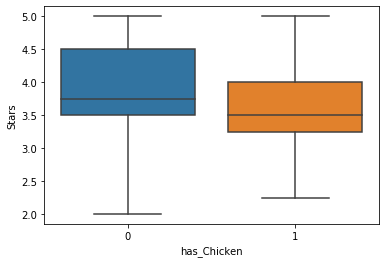

In [114]:
sns.boxplot(df['has_Chicken'],df['Stars'], showfliers=False)

The median of non Chicken noodle is higher than has_chicken noodle

In [115]:
# Check it legitness
mannwhitneyu(df[df['has_Chicken'] == 0]['Stars'],
             df[df['has_Chicken']== 1]['Stars'])

MannwhitneyuResult(statistic=593212.0, pvalue=2.2524646495376065e-10)

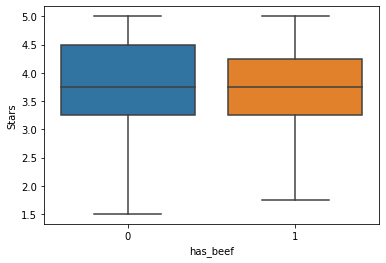

In [116]:
sns.boxplot(df['has_beef'],df['Stars'], showfliers=False)

In [117]:
mannwhitneyu(df[df['has_beef'] == 0]['Stars'],
             df[df['has_beef']== 1]['Stars'])

MannwhitneyuResult(statistic=476664.5, pvalue=0.0017956542204848806)

P-vale < 0.05 -> Statical significant 

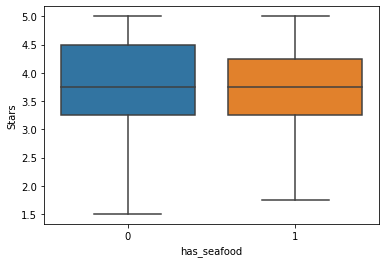

In [118]:
sns.boxplot(df['has_seafood'],df['Stars'], showfliers=False)

In [119]:
mannwhitneyu(df[df['has_seafood'] == 0]['Stars'],
             df[df['has_seafood']== 1]['Stars'])

MannwhitneyuResult(statistic=626226.5, pvalue=0.298820092010756)

Cant tell from he plot, p-value > 0.05, Not Statical significant, base on seafood or not enough to tell the different

In [120]:
df

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


In [121]:
df.to_csv('thebiglist_clean_extended.csv',index=None)

In [122]:
pd.read_csv('thebiglist_clean_extended.csv')

,Brand,Variety,Style,Country,Stars,is_Spicy,has_Chicken,has_beef,has_seafood
0,Higashimaru,Seafood Sara Udon,Pack,Japan,5.0,0,0,0,1
1,Single Grain,Chongqing Spicy & Sour Rice Noodles,Cup,China,3.5,1,0,0,0
2,Sau Tao,Seafood Flavour Sichuan Spicy Noodle,Pack,Hong Kong,5.0,1,0,0,1
3,Sau Tao,Jiangnan Style Noodle - Original Flavour,Pack,Hong Kong,4.5,0,0,0,0
4,Sapporo Ichiban,CupStar Shio Ramen,Cup,Japan,3.5,0,0,0,0
...,...,...,...,...,...,...,...,...,...
3687,Vifon,"Hu Tiu Nam Vang [""Phnom Penh"" style] Asian Sty...",Bowl,Vietnam,3.5,0,0,0,0
3688,Wai Wai,Oriental Style Instant Noodles,Pack,Thailand,1.0,0,0,0,0
3689,Wai Wai,Tom Yum Shrimp,Pack,Thailand,2.0,1,0,0,1
3690,Wai Wai,Tom Yum Chili Flavor,Pack,Thailand,2.0,1,0,0,0


### Summary:
1. Examined the variety column
2. Extraction useful information from variety
   - is_Spicy
   - has_Chicken
   - has_Seafood
   - has_Seafood
3. Performed visualization to answer several questions
4. Exported the extended DataFrame
